$\textbf{Sheet08}$

Ex. 15


(a)

Die Response-Matrix beschreibt allgemein den Messprozess und ist ein linearer Operator $A: Af = g$. Die Matrix bildet die wahre Verteilung auf die gemessene Verteilung ab. Das Matrixelement
$A_{ij}$ ist die Wahrscheinlichkeit, das Event $x$ aus Bin $j$ nach der Messung als $y$ in Bin $i$ zu finden. Im konkreten Beispiel beschreibt die Matrix eine Verschmierung in benachbarte Bins (da auch Nebendiagonalelemente).

In [450]:
import numpy as np
import matplotlib.pyplot as plt

In [451]:
def response_matrix_A(n, epsilon = 0.23):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i, j] = 1-2*epsilon
            elif i == j + 1:
                A[i, j] = epsilon
            elif i == j - 1:
                A[i, j] = epsilon
    return A

(b)

Text(0, 0.5, 'Counts')

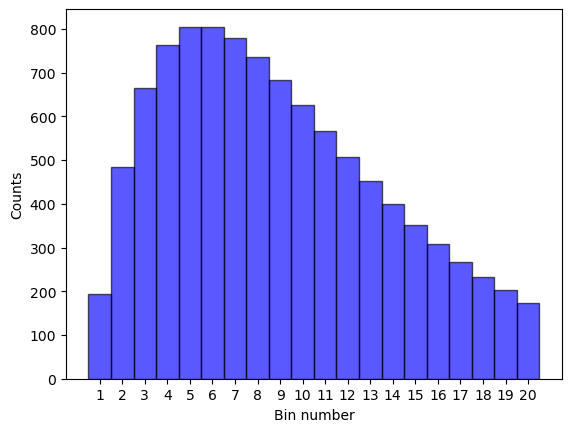

In [452]:
bin_values = np.array([193, 485, 664, 763, 804, 805, 779, 736, 684, 626, 566, 508, 452, 400, 351, 308, 268, 233, 202, 173])
bins = np.arange(1, 21, 1)
plt.bar(bins, bin_values, width=1, color='b', edgecolor='k', alpha=0.65)
plt.xticks(bins)
plt.xlabel('Bin number')
plt.ylabel('Counts')

In [453]:
def measurement(f):
    n = len(f)
    A = response_matrix_A(n)
    g = A @ f
    g_measured = np.random.poisson(g)
    return g_measured, A

In [454]:
import numpy as np
import matplotlib.pyplot as plt
    

def diagonalize(A):
    ew, ev = np.linalg.eig(A)
    idx = ew.argsort()[::-1]
    ew = ew[idx]
    ev = ev[:,idx]
    U = ev
    U_inv = np.linalg.inv(U)
    D = U_inv @ A @ U
    np.round(D, 3, out=D)
    np.round(U, 3, out=U)
    np.round(U_inv, 3, out=U_inv)
    return D, U, U_inv


(d)

In [455]:
f = bin_values
g_measured, A = measurement(f)
D, U, U_inv = diagonalize(A)
#coefficients c and b
c = U_inv @ g_measured
b = U_inv @ f
b_measured = np.linalg.inv(D) @ np.linalg.inv(U) @ g_measured
#bvb formula for covariance
cov_b_measured = np.linalg.inv(D) @ np.linalg.inv(U) @ np.diag(g_measured) @ (np.linalg.inv(U) @ np.linalg.inv(D)).T
cov_b = np.linalg.inv(D) @ np.linalg.inv(U) @ np.diag(f) @ (np.linalg.inv(U) @ np.linalg.inv(D)).T
#scale to standard deviation
norm_b_measured = b_measured / np.sqrt(cov_b_measured.diagonal())
norm_b = b / np.sqrt(cov_b.diagonal())
#basis change
f = U @ b
g_measured = U @ c
norm_b_measured = np.array(norm_b_measured)
norm_b = np.array(norm_b)
norm_b_measured = norm_b_measured.reshape(20,1)
norm_b = norm_b.reshape(20,1)
norm_b_measured = np.abs(norm_b_measured)
norm_b_measured[0] = -norm_b_measured[0]
norm_b = np.abs(norm_b)
norm_b[0] = -norm_b[0]

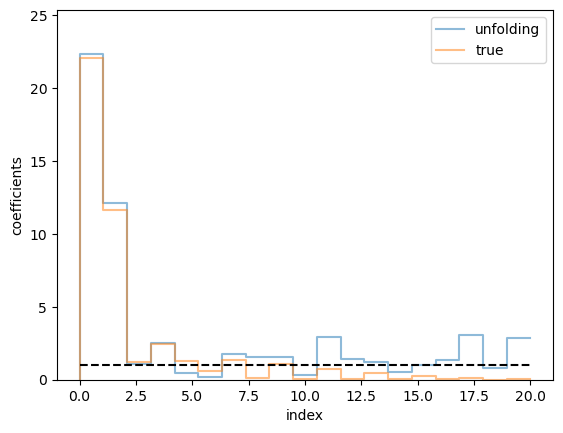

In [456]:
x = np.linspace(0, 20, 20)
plt.step(x, norm_b_measured, label='unfolding',alpha=0.5)
plt.step(x, norm_b, label='true',alpha=0.5)
plt.legend()
plt.xlabel('index')
plt.ylabel('coefficients')
plt.ylim(0, max(norm_b_measured) + 3)
plt.hlines(1, 0, 20, color = 'black', linestyle = 'dashed')

(e)

In [457]:
for i in range(20):
    if norm_b_measured[i+1] < 1:
        norm_b_measured[i:] = 0
        index = i
        break
U_reg = U[:, :index]
norm_b_measured_reg = norm_b_measured[:index]
f_reg = U_reg @ norm_b_measured_reg
#keine ahnung iwas funktioniert nicht

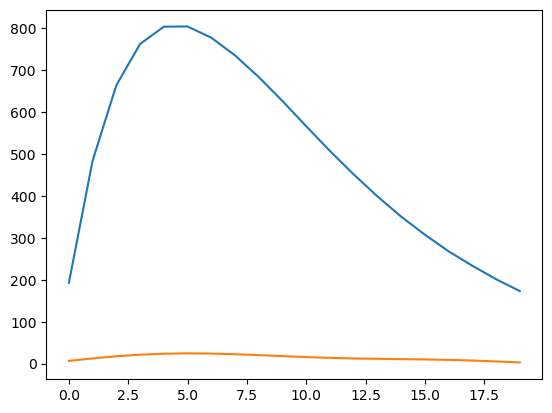

In [458]:
plt.plot(f)
plt.plot(f_reg)

Die regularisierte Lösung sollte die Oszillationen entfernen.